## Logestic Regression
#### Import modules

In [1]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

#### Read Dataframe

In [2]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

#### Define Logistic Regression model

In [3]:
# Logistic Regression with all numerical variables are fetched into PCA

num_pipeline  = Pipeline([('scaler', StandardScaler()),
                         #('pca', PCA(n_components=0.98))
                         ])

preprocessor  = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

model_lr      = LogisticRegression(solver       = 'saga',    # 'saga' 'lbfgs'
                                   max_iter     = 1000, 
                                   class_weight = 'balanced', 
                                   random_state = 42)


pipeline_lr   = Pipeline([('preprocessor', preprocessor),
                          ('logisticRegression', model_lr)
                        ])

pipeline_lr.fit(X_train, y_train)

# Evaluate the model:
pred_lr        = pipeline_lr.predict(X_test)
f1_lr          = f1_score(y_test, pred_lr)
recall_lr      = recall_score(y_test, pred_lr)
precision_lr   = precision_score(y_test, pred_lr)
accuracy_lr    = accuracy_score(y_test, pred_lr)


lr_metrics     = pd.DataFrame({
                                'Model'    : ['Logistic Regression'],
                                'F1 Score' : [f1_lr],
                                'Recall'   : [recall_lr],
                                'Precision': [precision_lr],
                                'Accuracy' : [accuracy_lr]
                            })

#### Scores and confusion matrix

Scoring of Logistic Regression Classifier


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.384818,0.605201,0.282094,0.750533


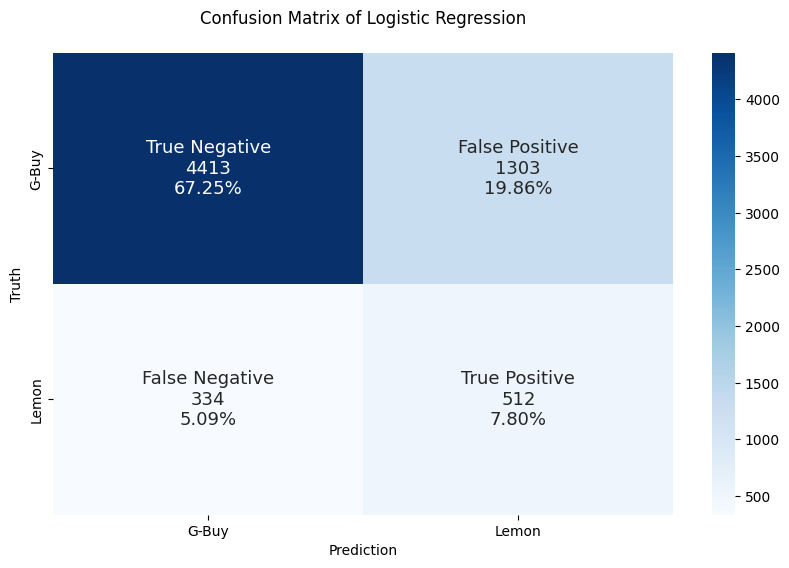

In [4]:
print('Scoring of Logistic Regression Classifier')
display(lr_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_lr, 'Logistic Regression');

#### Logistic Regression Pipeline and GridSearchCV

In [17]:
num_pipeline   = Pipeline([('scaler', StandardScaler()),
                           ('pca'   , PCA(n_components=0.99))
                         ])

preprocessor   = ColumnTransformer([('num', num_pipeline, num_cols),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                   ])

model_lr       = LogisticRegression(solver       = 'saga', 
                                    max_iter     = 1000, 
                                    class_weight = 'balanced', 
                                    random_state = 42)

pipeline_lr    = Pipeline([('preprocessor', preprocessor),
                           ('logisticRegr', model_lr)
                          ])
# ----------------------------------------------------------------------------------------
param_grid     = {'logisticRegr__C': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
                  'logisticRegr__penalty': ['l1', 'l2']
                  }

model_lr_grid = GridSearchCV(estimator  = pipeline_lr, 
                              param_grid = param_grid, 
                              scoring    = 'f1',
                              cv         = 5, 
                              n_jobs     = 8
                              )



#### Model fitting, Scores and confusion matrix

In [18]:
model_lr_grid.fit(X_train, y_train)

# Extract the best estimator
optimised_lr_grid    = model_lr_grid.best_estimator_
optimised_lr_params  = model_lr_grid.best_params_

# Evaluate the Model
pred_lr_grid      = optimised_lr_grid.predict(X_test)
f1_lr_grid        = f1_score(y_test       , pred_lr_grid)
recall_lr_grid    = recall_score(y_test   , pred_lr_grid)
precision_lr_grid = precision_score(y_test, pred_lr_grid)
accuracy_lr_grid  = accuracy_score(y_test , pred_lr_grid)

grid_lr_metrics = pd.DataFrame({
                                'Model'    : ['GridSearch Optimised LR'],
                                'F1 Score' : [f1_lr_grid],
                                'Recall'   : [recall_lr_grid],
                                'Precision': [precision_lr_grid],
                                'Accuracy' : [accuracy_lr_grid]
                               })

#### Optimsied model and hyperparameters

In [19]:
print('Scoring of GridSearch Optimised LR Classifier')
print('Optimised LR Model:'     , optimised_lr_grid)
print("Optimised LR Parameters:", optimised_lr_params)

Scoring of GridSearch Optimised LR Classifier
Optimised LR Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
  

#### Scores and confusion matrix

Scoring of GridSearch Optimised LR


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised LR,0.397497,0.638298,0.288616,0.750533


(array([[4385, 1331],
        [ 306,  540]], dtype=int64),
 <Figure size 1000x600 with 2 Axes>)

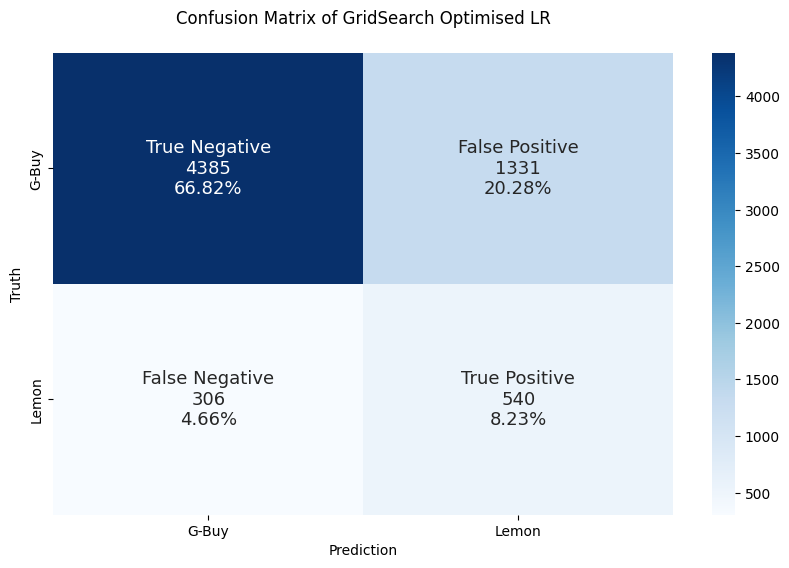

In [20]:
print('Scoring of GridSearch Optimised LR')
display(grid_lr_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_lr_grid, 'GridSearch Optimised LR')

#### Save the optimised model as pickle

In [21]:
# Save the model as it is quite demanding

directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename = "optimised_GridSearch_LR_saga.p"

pickle.dump(model_lr_grid, open(directory_path + "\\" + filename, "wb"))